https://www.tensorflow.org/tutorials/keras/classification

In [512]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras


# Helper libraries
import re
import os
import glob
import pathlib
import numpy as np

from PIL import Image
from matplotlib import image
from matplotlib import pyplot as plt

from numpy import expand_dims

from keras.models import Model
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array

print(tf.__version__)

2.8.0


In [265]:
def get_data(path):
    """
    Generates numpy arrays for images and labels from named files in directories. 
    """
    IMAGE_SRC_DIR = path

    # regex expression for label generation
    MATCH = r"(Triangle|Square|Pentagon|Hexagon|Heptagon|Octagon|Nonagon|Circle|Star)"

    # get filenames of images
    fnames = np.array(glob.glob(os.path.join(IMAGE_SRC_DIR, "*")))

    # get images as numpy arrays
    images = []
    for fname in fnames:
        shape = np.asarray(Image.open(fname))
        images.append(shape)
    # stack and reshape arrays
    images = np.stack(images, axis = 0) # create numpy array from list

    # get labels from filenames
    labels = []
    for fname in fnames:
        shape  = re.search(MATCH, fname)
        labels.append(shape.group(1))
    label_names = np.array(labels) # create numpy array from list

    # dict of shapes integer values
    class_map = {"Triangle" : 0, "Square"   : 1, "Pentagon" : 2,
                "Hexagon"   : 3, "Heptagon" : 4, "Octagon"  : 5,
                "Nonagon"   : 6, "Circle"   : 7, "Star"     : 8}
    # replace shape names with interger values
    label_values = np.array([class_map[name] for name in label_names])

    # reshape array to correct dimension
    labels = label_values.reshape(label_values.shape[0], -1) # shape: (number of examples, 1)

    return images, labels

In [545]:
train_dir = "/Users/martin/Sites/playground/tensorflow/shapes/data/train/"
valid_dir = "/Users/martin/Sites/playground/tensorflow/shapes/data/valid/"
test_dir  = "/Users/martin/Sites/playground/tensorflow/shapes/data/test/"

In [546]:
train_images, train_labels = get_data(train_dir)

In [547]:
valid_images, valid_labels = get_data(valid_dir)

In [548]:
test_images, test_labels = get_data(test_dir)

In [549]:
# sanity checks
print(f"train images shape: {train_images.shape}")
print(f"train labels shape: {train_labels.shape}")
print("\n")
print(f"valid images shape: {valid_images.shape}")
print(f"valid images shape: {valid_labels.shape}")
print("\n")
print(f"test images shape: {test_images.shape}")
print(f"test images shape: {test_labels.shape}")

train images shape: (9000, 200, 200, 3)
train labels shape: (9000, 1)


valid images shape: (900, 200, 200, 3)
valid images shape: (900, 1)


test images shape: (900, 200, 200, 3)
test images shape: (900, 1)


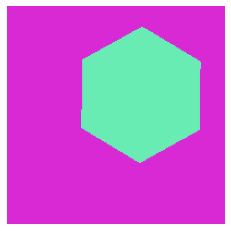

In [271]:
plt.figure()
plt.imshow(train_images[0])
plt.grid(False)
plt.axis("off")
plt.show()

In [272]:
train_images = train_images / 255.0
test_images = test_images / 255.0

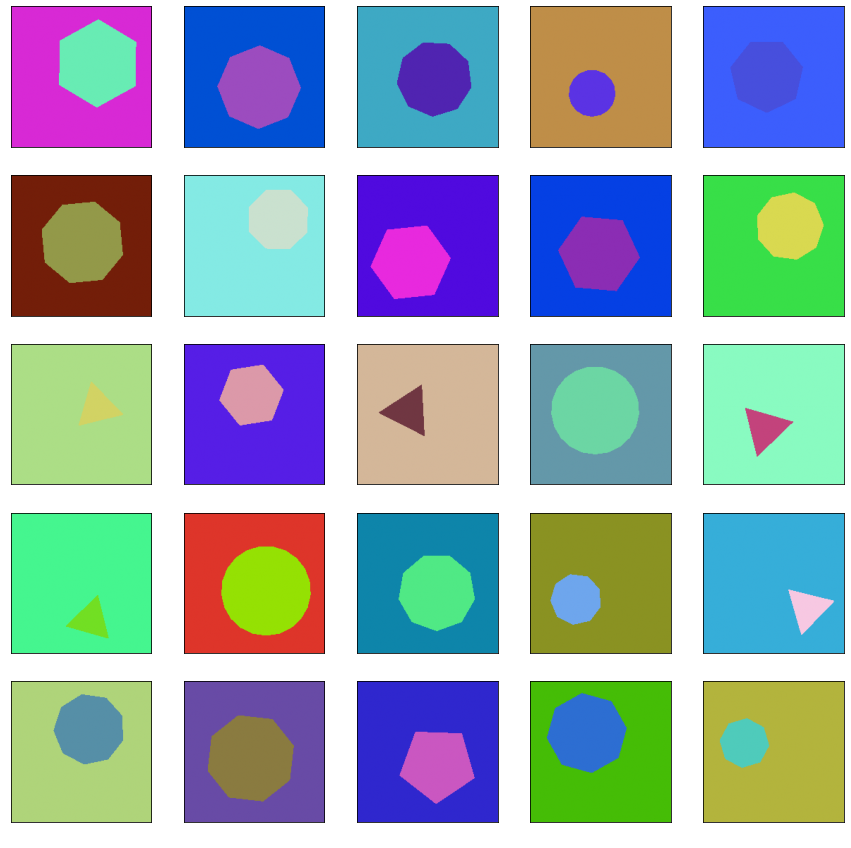

In [430]:
plt.figure(figsize = (15, 15))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(train_labels[i], fontsize=15, color="white")
plt.show()

In [274]:
# model = tf.keras.Sequential([
#         tf.keras.layers.RandomRotation(0.2),
#         tf.keras.layers.Flatten(input_shape=(200, 200, 3)),
#         tf.keras.layers.Dense(128, activation='relu'),
#         tf.keras.layers.Dense(9)])

In [318]:
model = tf.keras.models.Sequential()
model.add(layers.RandomRotation(0.2))
model.add(layers.Conv2D(16, 3, padding='same', activation='relu'))
model.add(layers.MaxPooling2D())
model.add(layers.Conv2D(32, 3, padding='same', activation='relu'))
model.add(layers.MaxPooling2D())
model.add(layers.Conv2D(64, 3, padding='same', activation='relu'))
model.add(layers.MaxPooling2D())
model.add(layers.Dropout(0.2))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(9))

In [364]:
model.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 random_rotation_17 (RandomR  (None, 200, 200, 3)      0         
 otation)                                                        
                                                                 
 conv2d_11 (Conv2D)          (None, 200, 200, 16)      448       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 100, 100, 16)     0         
 2D)                                                             
                                                                 
 conv2d_12 (Conv2D)          (None, 100, 100, 32)      4640      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 50, 50, 32)       0         
 g2D)                                                            
                                                     

In [319]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [381]:
history = model.fit(train_images, train_labels, batch_size=32, validation_split=0.2, epochs = 50)

Epoch 1/50
225/225 [==============================] - 120s 534ms/step - loss: 1.2757 - accuracy: 0.4913 - val_loss: 1.1634 - val_accuracy: 0.5261
Epoch 2/50
225/225 [==============================] - 105s 467ms/step - loss: 1.1736 - accuracy: 0.5322 - val_loss: 1.0864 - val_accuracy: 0.5656
Epoch 3/50
225/225 [==============================] - 105s 468ms/step - loss: 1.0838 - accuracy: 0.5728 - val_loss: 1.0085 - val_accuracy: 0.5828
Epoch 4/50
225/225 [==============================] - 105s 466ms/step - loss: 1.0315 - accuracy: 0.5869 - val_loss: 0.9376 - val_accuracy: 0.6144
Epoch 5/50
225/225 [==============================] - 100s 443ms/step - loss: 0.9614 - accuracy: 0.6182 - val_loss: 0.9056 - val_accuracy: 0.6311
Epoch 6/50
225/225 [==============================] - 98s 433ms/step - loss: 0.9145 - accuracy: 0.6283 - val_loss: 0.8657 - val_accuracy: 0.6483
Epoch 7/50
225/225 [==============================] - 97s 433ms/step - loss: 0.8549 - accuracy: 0.6524 - val_loss: 0.8266 - v

In [399]:
model.save("keras_model")

2022-03-12 10:15:28.639292: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: keras_model/assets


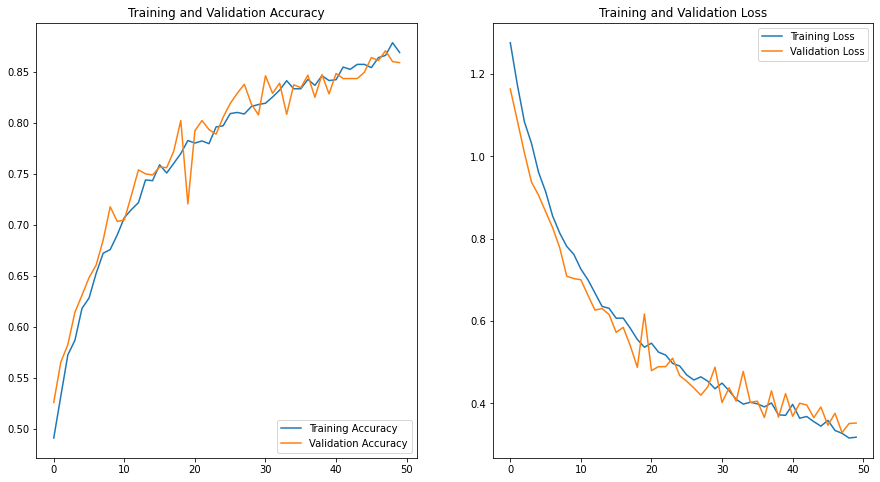

In [383]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(50)

plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [384]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

29/29 - 3s - loss: 3.7923 - accuracy: 0.6511 - 3s/epoch - 91ms/step

Test accuracy: 0.6511111259460449


In [385]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

In [404]:
predictions = probability_model.predict(test_images)

In [405]:
predictions[0]

array([1.8601411e-06, 2.4970282e-02, 7.2729790e-01, 2.4477921e-01,
       2.8914614e-03, 5.9347924e-05, 2.9122251e-08, 5.0519880e-13,
       4.8951845e-12], dtype=float32)

In [388]:
np.argmax(predictions[0])

2

In [389]:
test_labels[0]

array([3])

In [431]:
def plot_image(i, predictions_array, true_label, img):
  
  predicted_label = np.argmax(predictions_array)

  true_label, img = true_label[i], img[i]
  plt.xticks([])
  plt.yticks([])
  plt.xlabel(f"{[predicted_label]} {100 * np.max(predictions_array):2.0f}%", fontsize=15, color="white")
  plt.imshow(img)

# dict of shapes integer values
  shapes = {"Triangle" : 0, "Square"   : 1, "Pentagon" : 2,
            "Hexagon"   : 3, "Heptagon" : 4, "Octagon"  : 5,
            "Nonagon"   : 6, "Circle"   : 7, "Star"     : 8}

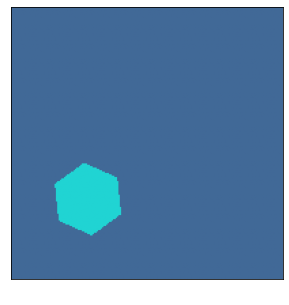

In [432]:
i = 0
plt.figure(figsize=(5, 5))
plot_image(i, predictions[i], test_labels, test_images)

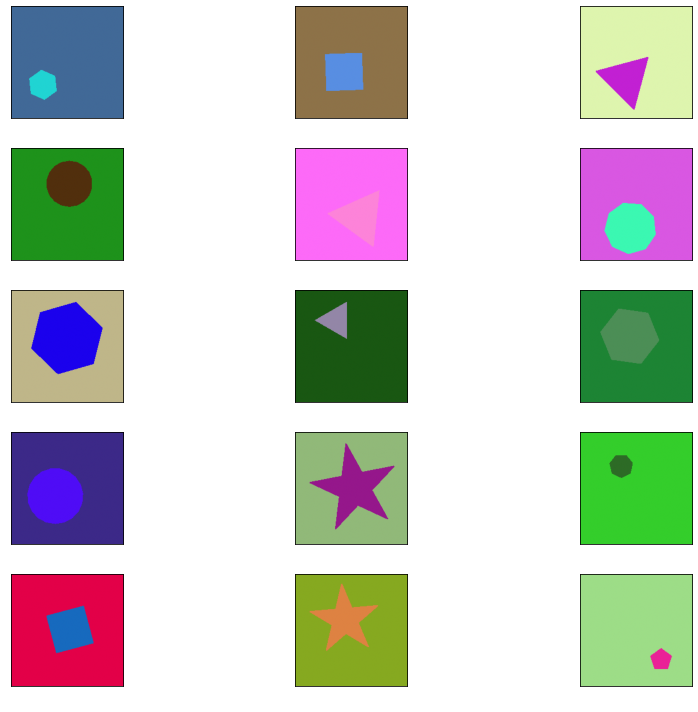

In [433]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows * num_cols

plt.figure(figsize=(2 * 2 * num_cols, 2 * num_rows))

for i in range(num_images):
  plt.subplot(num_rows, 2 * num_cols, 2 * i + 1)
  plot_image(i, predictions[i], test_labels, test_images)
  
plt.tight_layout()
plt.show()

In [422]:
# Grab an image from the test dataset.
img = test_images[0]

print(img.shape)

(200, 200, 3)


In [423]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img, 0))

print(img.shape)

(1, 200, 200, 3)


In [424]:
predictions_single = probability_model.predict(img)

print(predictions_single)

[[1.8601490e-06 2.4970401e-02 7.2729748e-01 2.4477936e-01 2.8914723e-03
  5.9348058e-05 2.9122289e-08 5.0520238e-13 4.8951446e-12]]


In [425]:
np.argmax(predictions_single[0])

2

# Visualization of filters

https://machinelearningmastery.com/how-to-visualize-filters-and-feature-maps-in-convolutional-neural-networks/

In [495]:
# summarize filters in each convolutional layer
# each conv layers has weights bias values
# all are (3, 3) filters with matching input in third positon
# last positon is the number of applied filters e.g. (3, 3, 3, 16)
for layer in model.layers:
	# check for convolutional layer
	if 'conv' not in layer.name:
		continue
	# get filter weights
	filters, biases = layer.get_weights()
	print(layer.name, filters.shape)

conv2d_11 (3, 3, 3, 16)
conv2d_12 (3, 3, 16, 32)
conv2d_13 (3, 3, 32, 64)


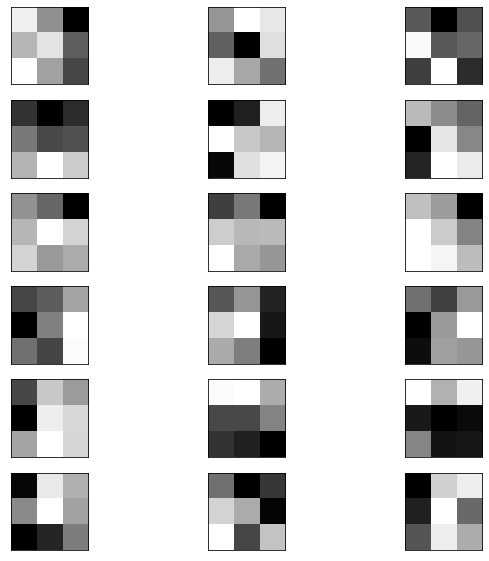

In [500]:
# retrieve weights from the second hidden layer
# conv2d layer numbers in this model are: 1, 3, 5
filters, biases = model.layers[1].get_weights() # conv2d_12 layer

# normalize filter values to 0-1 so we can visualize them
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)

plt.figure(figsize=(10, 10))
# rows:    diffent filters
# columns: differen channels
n_filters, ix = 6, 1
for i in range(n_filters):
	# get the filter
	f = filters[:, :, :, i]

	# plot each channel separately
	for j in range(3):
		# specify subplot and turn of axis
		ax = plt.subplot(n_filters, 3, ix)
		ax.set_xticks([])
		ax.set_yticks([])

		# plot filter channel in grayscale
		plt.imshow(f[:, :, j], cmap='gray')
		ix += 1

# show the figure
# rows:    diffent filters
# columns: differen channels
plt.show()

# Visualization of features (first conv2d layer)

https://machinelearningmastery.com/how-to-visualize-filters-and-feature-maps-in-convolutional-neural-networks/

In [503]:
# conv2d layer numbers in this model are: 1, 3, 5

# summarize feature map shapes
for i in range(len(model.layers)):
	layer = model.layers[i]
	# check for convolutional layer
	if 'conv' not in layer.name:
		continue
	# summarize output shape
	print(i, layer.name, layer.output.shape)

1 conv2d_11 (None, 200, 200, 16)
3 conv2d_12 (None, 100, 100, 32)
5 conv2d_13 (None, 50, 50, 64)


In [505]:
# NOTE: should have name model to model_conv2d_layer_1
model = Model(inputs=model.inputs, outputs=model.layers[1].output)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 random_rotation_17_input (I  [(None, 200, 200, 3)]    0         
 nputLayer)                                                      
                                                                 
 random_rotation_17 (RandomR  (None, 200, 200, 3)      0         
 otation)                                                        
                                                                 
 conv2d_11 (Conv2D)          (None, 200, 200, 16)      448       
                                                                 
Total params: 448
Trainable params: 448
Non-trainable params: 0
_________________________________________________________________


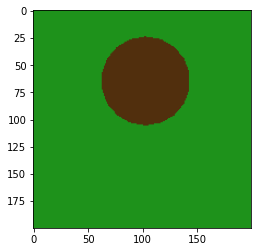

In [539]:
# load the image with the required shape
img = load_img('data/test/Circle_0b73d552-9cab-11ec-b61e-235a07e81dcd.png', target_size=(200, 200))
plt.imshow(img)

In [540]:
# convert the image to an array
img = img_to_array(img) / 255.0 # we did this to input data

# expand dimensions so that it represents a single 'sample'
img = expand_dims(img, axis=0)

In [541]:
# get feature map for first hidden layer
feature_maps = model.predict(img)

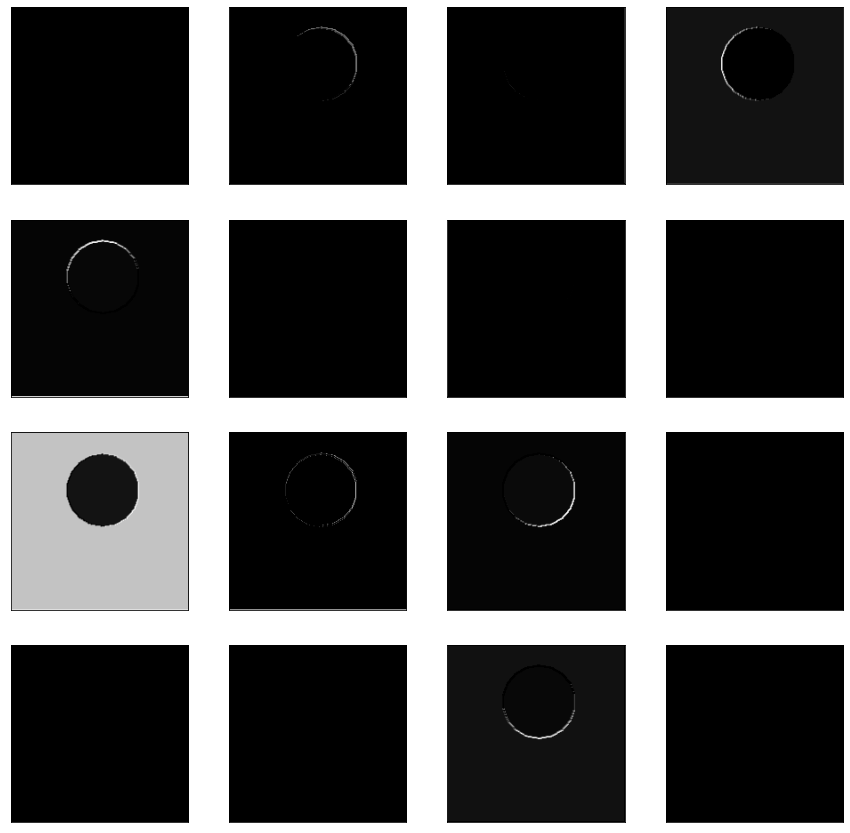

In [544]:
# plot all 16 maps in an 4 x 4 squares
plt.figure(figsize=(15, 15))

square = 4
ix = 1
for _ in range(square):
	for _ in range(square):
		# specify subplot and turn of axis
		ax = plt.subplot(square, square, ix)
		ax.set_xticks([])
		ax.set_yticks([])
		# plot filter channel in grayscale
		plt.imshow(feature_maps[0, :, :, ix-1], cmap='gray')
		ix += 1
# show the figure
plt.show()